In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys

In [2]:
root_dir = abspath(join(pardir, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/no',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
name = "no"
comp_dir = join(root_data_dir, "Effective-Completeness", name)
spectral_dir = join(root_data_dir, "Color", name)

In [6]:
data_dir = join(root_data_dir, "Effective-Volume")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Effective-Volume", name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume/no already exist. Good to go!


In [7]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/no/comp

In [8]:
index = 0
name = files[index].split("/")[-1]
name

'comp_(-0.019)_(0.127).hdf5'

In [9]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,dm,comp
0,-4.0,1.857784879780074e-10
1,-3.808080808080808,6.250300501256317e-10
2,-3.6161616161616164,2.019505117318487e-09
3,-3.4242424242424243,6.267453194727305e-09
4,-3.2323232323232323,1.868565145480802e-08
...,...,...
95,14.232323232323232,0.008579498474283593
96,14.424242424242422,0.005030946835943911
97,14.616161616161616,0.0028501570152633226
98,14.808080808080806,0.001559340861474476


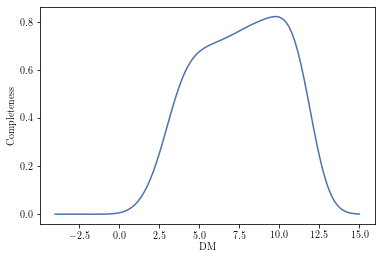

In [10]:
compDM = df_comp["comp"].to_numpy()
DM = df_comp["dm"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

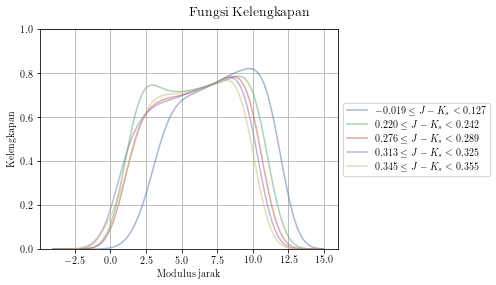

'comp_(0.345)_(0.355).hdf5'

In [11]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(7, 4))
for file in files[::3]:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["comp"].to_numpy()
    DM = df_comp["dm"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq J-K_s < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('..', 'img', "fungsi-kelengkapan-no.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [12]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False, kind="cubic")

compDM_interp(-20)

array(0.)

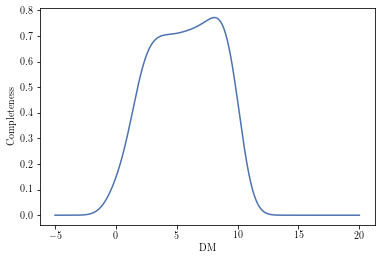

In [13]:
dms = np.linspace(-5, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [14]:
R = 150
Z = 300

In [16]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [17]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        # b = np.arctan(zz/rr)
        # if np.abs(zz) < 50:
        eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 236.47it/s]


(0.0, 1.0)

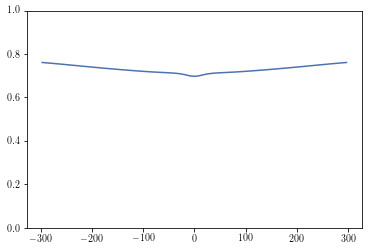

In [18]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

only for index 0 and 2, cut the midplane

  0%|          | 0/499 [00:00<?, ?it/s]

100%|██████████| 499/499 [00:01<00:00, 459.48it/s]


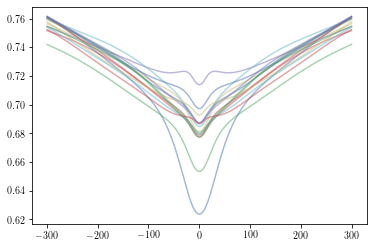

In [19]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 300
R = 150
ez = np.linspace(-Z, Z, 500) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
fracs = np.empty((len(files), len(z)))
names = []
for i, file in enumerate(files):
    name = file.split("/")[-1]
    names.append(name)
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["comp"].to_numpy()
    DM = df_comp["dm"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)
    # plt.plot(dms, compDMs, color=colors[i], alpha=0.5)
    # continue
    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            b = np.arctan(zz/rr)
            # if np.abs(zz) < 13.79310345 and i < 1:
            #     continue
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    # if i % 4 == 0:
        # ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
    fracs[i] = frac
    df = vaex.from_arrays(z=z, frac=frac)
    # df.export(join(data_dir, name), progress=True)
# ax.set_xlabel(r"$z$ (pc)")
# ax.set_ylabel("Kelengkapan Efektif")
# ax.grid()
# ax.set_ylim(0,1)
# ax.set_xlim(-Z, Z)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# fig.savefig(join('..', 'img', "fungsi-kelengkapan-efektif.pdf"), dpi=200)

In [20]:
len(fracs)

15

In [21]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in names:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.054 , 0.1585, 0.205 , 0.231 , 0.251 , 0.268 , 0.2825, 0.295 ,
       0.307 , 0.319 , 0.33  , 0.34  , 0.35  , 0.36  , 0.3695])

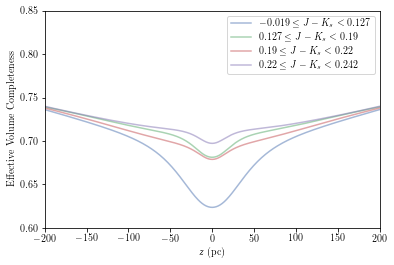

In [31]:
for i, frac in enumerate(fracs[::4]):
    plt.plot(z, frac, label=r"${}\leq J-K_s < {}$".format(c1[i], c2[i]), alpha=0.5)

plt.ylim(0.6,0.85)
plt.xlim(-200, 200)
plt.ylabel("Effective Volume Completeness")
plt.xlabel(r"$z$ (pc)")
plt.legend()
# plt.xlim(-Z, Z)
plt.savefig(join('..', 'img', "fungsi-kelengkapan-efektif-volume.pdf"), dpi=70)
plt.show()

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [################################

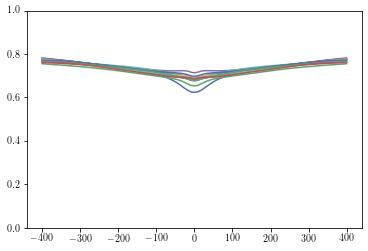

In [20]:
for frac, name in zip(fracs, names):
    plt.plot(z, frac)
    plt.ylim(0,1)

    df  = vaex.from_arrays(z=z, frac=frac)
    # print(df)
    df.export(join(data_dir, name), progress=True)